In [35]:
import warnings
warnings.filterwarnings("ignore")

### Read the data 

In [301]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import scipy as sc 
from matplotlib import pyplot as plt  

In [593]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

Defaulting to user installation because normal site-packages is not writeable


In [594]:
# print the shape of the variable values
X.shape

(48842, 14)

In [595]:
#print first five elements of the vriables
X.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [596]:
# Check for columns and its data types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [597]:
# print the shape of the y values
y.shape

(48842, 1)

In [598]:
# print first five values of yabs
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [599]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [600]:
data = X.join(y)

In [601]:
data.shape

(48842, 15)

In [602]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [603]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [604]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [605]:
# Checking for classes with null values
data.isnull().sum()  # work class, occupation and native country has null values

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [606]:
# Check for number of unique columns in each class
data.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [607]:
# descibe how data is distributed for integer data types
data.describe().T

# Things can be identified - Most of the ages are between late20's to 40's
# Capital gain and capital loss consists with mainly 0's 
# Working hours per week is mostly close to 40 hours

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [608]:
# Unique values of the workClass
data["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [609]:
# Check the workclass values of ? (1836 points  ?)
filter = data["workclass"] == "?"
data.loc[filter].shape

(1836, 15)

In [610]:
data[(data["workclass"].isnull() == True)].shape

(963, 15)

In [611]:
data[data["workclass"].isnull() == True].sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
40095,62,NaN,221064,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K.
33717,48,NaN,117054,5th-6th,3,Divorced,NaN,Not-in-family,White,Male,0,0,99,United-States,<=50K.
42055,20,NaN,39803,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K.
38293,22,NaN,356286,HS-grad,9,Never-married,NaN,Own-child,Black,Male,0,0,10,United-States,<=50K.
42738,21,NaN,133515,Assoc-acdm,12,Never-married,NaN,Own-child,White,Female,594,0,40,United-States,<=50K.


In [612]:
data[data["workclass"] == "?"].sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11430,31,?,82473,9th,5,Divorced,?,Not-in-family,White,Female,0,0,25,United-States,<=50K
2952,22,?,35448,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,22,United-States,<=50K
1347,17,?,145886,11th,7,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
1773,17,?,158762,10th,6,Never-married,?,Own-child,White,Female,0,0,20,United-States,<=50K
6640,18,?,128538,Some-college,10,Never-married,?,Own-child,White,Female,0,0,6,United-States,<=50K


In [613]:
data["workclass"].replace({"?": np.nan}, inplace=True)

In [614]:
data["workclass"].isnull().sum()

2799

In [615]:
data["workclass"].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

<BarContainer object of 8 artists>

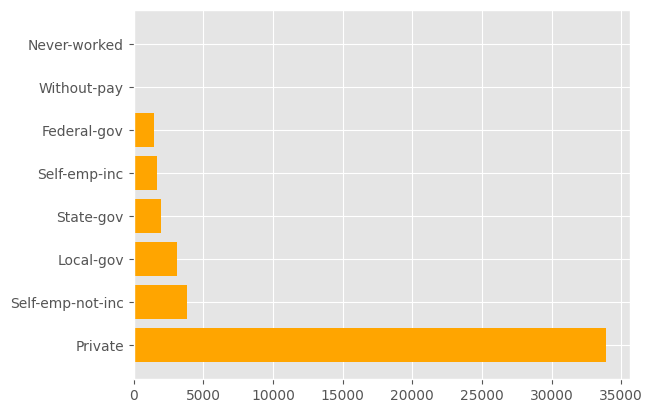

In [616]:
plt.barh(data["workclass"].value_counts().index, data["workclass"].value_counts().values, color="orange") 

In [617]:
# Filled the null values of the workclass column with mode, 
# since Private has a huge frequency
data["workclass"].fillna(data["workclass"].mode().iloc[0], inplace=True)

In [618]:
# Unique valus after replacement
data["workclass"].value_counts()

workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [619]:
data[data["occupation"].isnull() == True].shape[0]

966

In [620]:
data["occupation"].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [621]:
# Replacing ? values with nan
data["occupation"].replace("?", np.nan, inplace=True)

In [622]:
# Null values of occupation after replacement
data[data["occupation"].isnull() == True].shape[0]

2809

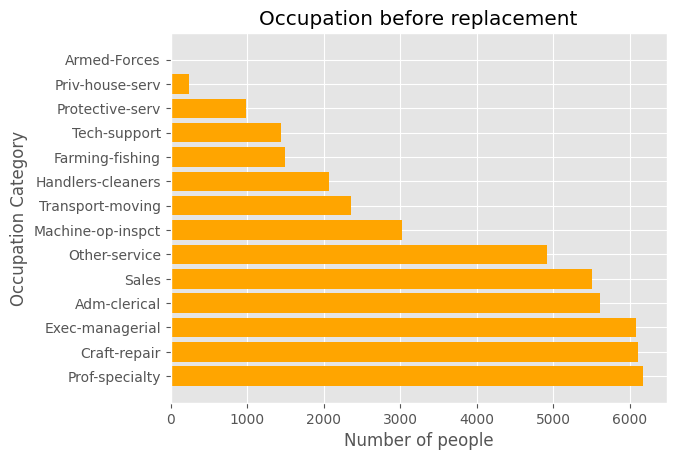

In [623]:
plt.title("Occupation before replacement")
plt.ylabel("Occupation Category")
plt.xlabel("Number of people")
keys = data["occupation"].value_counts().index
values = data["occupation"].value_counts().values
plt.barh(keys, values, color="orange")
plt.show()

In [624]:
import random
import numpy as np

occupation_categories = ["Prof-specialty", "Craft-repair", "Exec-managerial", "Adm-clerical", "Sales"]
data["occupation"] = data["occupation"].apply(lambda x: random.choice(occupation_categories) if pd.isnull(x) else x)

In [625]:
data["occupation"].value_counts()

occupation
Prof-specialty       6752
Craft-repair         6677
Exec-managerial      6627
Adm-clerical         6173
Sales                6065
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

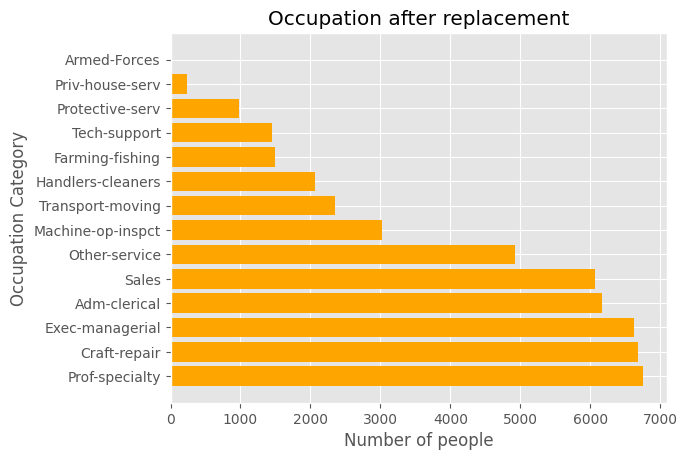

In [626]:
plt.title("Occupation after replacement")
plt.ylabel("Occupation Category")
plt.xlabel("Number of people")
keys = data["occupation"].value_counts().index
values = data["occupation"].value_counts().values
plt.barh(keys, values, color="orange")
plt.show()

In [627]:
data[data["native-country"].isnull() == True].shape

(274, 15)

In [628]:
data[data["native-country"] == "?"].shape

(583, 15)

In [629]:
data["native-country"].replace("?", np.nan, inplace=True)

In [630]:
# get the value count for native countries
data["native-country"].value_counts()
# Most of the values are from us, 
#then can replace the null and ? values with "United-States"

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [631]:
data["native-country"].fillna(data["native-country"].mode().iloc[0], inplace=True)

In [632]:
data["native-country"].value_counts()

native-country
United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [633]:
data.isnull().sum() # null values solved

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [634]:
data.nunique()

age                  74
workclass             8
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       41
income                4
dtype: int64

In [635]:
data["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [636]:
school_or_below = ['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', '12th', 'Preschool']
high_school = ['HS-grad']
college = ['Assoc-voc', 'Assoc-acdm', 'Some-college', 'Prof-school']
under_grad = ['Bachelors']
post_grad = ['Masters']
doctorate = ['Doctorate']

def change_education_values(value):
    if value in school_or_below:
        return "School or below"
    elif value in high_school:
        return "High School"
    elif value in under_grad:
        return "Bachelor degree"
    elif value in post_grad:
        return "Masters Degree"
    elif value in doctorate:
        return "Doctorate"
    elif value in college:
        return "College"
    
    
data["education"] = data["education"].apply(change_education_values) 

In [637]:
data["education"].value_counts()

education
High School        15784
College            15374
Bachelor degree     8025
School or below     6408
Masters Degree      2657
Doctorate            594
Name: count, dtype: int64

In [638]:
data["education"].value_counts().values.sum()

48842

In [639]:
data["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [640]:
data["marital-status"].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [641]:
# civ spouce - civillian spouce, af-spouce - from armed forces 
never_married = ['Never-married']
married = ['Married-civ-spouse', 'Married-AF-spouse']
divorced = ['Divorced']
# 'Married-spouse-absent' - (not living together)
other_status = ['Married-spouse-absent', 'Widowed', 'Separated']

def spouce_status_change_values(value):
    if value in never_married:
        return "Never-married"
    elif value in married:
        return "Married"
    elif value in divorced:
        return "Divorced"
    elif value in other_status:
        return "Other"
    
data["marital-status"] = data["marital-status"].apply(spouce_status_change_values)

In [642]:
data["marital-status"].value_counts()

marital-status
Married          22416
Never-married    16117
Divorced          6633
Other             3676
Name: count, dtype: int64

In [643]:
data["income"].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [644]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelor degree,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelor degree,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,High School,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,School or below,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelor degree,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [645]:
over_50k = [">50K", ">50K."]
less_equal_50k = ["<=50K", "<=50K."]

def income_classification_change(value):
    if value in over_50k:
        return ">50K"
    elif value in less_equal_50k:
        return "<=50K"
    
data["income"] = data["income"].apply(income_classification_change)

In [646]:
data["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [647]:
data["income"].value_counts() # there is an imbalance of the data set

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [648]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelor degree,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelor degree,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,High School,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,School or below,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelor degree,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
